In [18]:
'''
    keras模型种类:
    1,Sequential model
    2,Function API
'''
import tensorflow as tf

  # 模型层结构的写法:1.通过List包含
def model_neural_layers_1() -> tf.keras.Model:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    return model
#写法2,在model内设定输入层及维度参数shape
def model_neural_layers_2() -> tf.keras.Model:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    inputs = tf.keras.Input(shape=(28,28))
    # inputs = tf.Variable(tf.random.truncated_normal([28,28]))
    return tf.keras.Model(inputs=inputs,outputs=model(inputs))
#写法3,直接串连神经层
def model_neural_layers_3() -> tf.keras.Model:
    layer1 = tf.keras.layers.Flatten(name='layer1')
    layer2 = tf.keras.layers.Dense(128,activation='relu',name='layer2')
    layer3 = tf.keras.layers.Dropout(0.2,name='layer3')
    layer4 = tf.keras.layers.Dense(10,activation='softmax',name='layer4')
    input = tf.keras.Input(shape=(28,28),name='input')
    return tf.keras.models.Model(inputs=input,outputs=layer4(layer3(layer2(layer1(input)))))

#通过pop()会删减最上层(Top)。神经层是堆栈(Stack),后进先出
def model_neural_pop():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    print(f'神经层数:{len(model.layers)}')
    model.summary()
    model.pop()
    print(f'神经层数:{len(model.layers)}')
    model.summary()

    #加一层神经层
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    print(f'加一层之后的神经层数:{len(model.layers)}')
    model.summary()

    print("===============获取模型各神经层信息=====================")
    for layer in model.layers:
        print(f'神经层名称:{layer.name},神经层权重:{layer.weights}')
        model.summary()
'''
    模型神经层操作
'''
# mnist = tf.keras.datasets.mnist
# (x_train,y_train),(x_test,y_test) = mnist.load_data()
# x_train,x_test = x_train/255.0,x_test/255.0
# model = model_neural_layers_3()
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train,y_train,epochs=5)
# model.evaluate(x_test,y_test,verbose=2)

# 神经层pop
model_neural_pop()

神经层数:4


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

神经层数:3


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,480 (392.50 KB)

 Trainable params: 100,480 (392.50 KB)

 Non-trainable params: 0 (0.00 B)

加一层之后的神经层数:4


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

===============获取模型各神经层信息=====================
神经层名称:flatten_11,神经层权重:[]


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

神经层名称:dense_24,神经层权重:[<Variable path=sequential_10/dense_24/kernel, shape=(784, 128), dtype=float32, value=[[ 0.07626922 -0.04923175  0.02628212 ...  0.07120792 -0.06816925
   0.06893825]
 [-0.00710312 -0.04391929  0.06846892 ... -0.02595501  0.04735228
   0.05280329]
 [ 0.01461494  0.01852946  0.00235883 ...  0.0176847   0.06699961
   0.00736801]
 ...
 [ 0.01084859 -0.05873467  0.02472742 ...  0.03334986 -0.07545385
   0.0607869 ]
 [ 0.06852383  0.0279427  -0.07413119 ...  0.06138926  0.0135236
  -0.01411841]
 [ 0.05668207 -0.02626992  0.07767951 ... -0.01581117  0.00035696
   0.02064414]]>, <Variable path=sequential_10/dense_24/bias, shape=(128,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

神经层名称:dropout_10,神经层权重:[]


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

神经层名称:dense_26,神经层权重:[<Variable path=sequential_10/dense_26/kernel, shape=(128, 10), dtype=float32, value=[[-0.12465762 -0.12091164  0.0113641  ... -0.10198057 -0.01531142
   0.12898506]
 [-0.01836355  0.0911472  -0.14743431 ...  0.0304938   0.0931025
  -0.11011074]
 [ 0.12398802  0.10108002 -0.20509201 ... -0.08493488  0.08493026
   0.07563742]
 ...
 [ 0.19460396 -0.08304013  0.05807827 ...  0.06204356 -0.20053689
  -0.11295034]
 [-0.03088936  0.0295632  -0.1111872  ...  0.19544716 -0.10564168
  -0.13184737]
 [ 0.15218078  0.08286823 -0.16364838 ... -0.09723812  0.06061862
   0.19851585]]>, <Variable path=sequential_10/dense_26/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
'''
    一边加神经层,一边显示模型汇总信息
'''
import tensorflow as tf
layers = tf.keras.layers

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(250,250,3))) # 250 x 250 RGB图片
model.add(layers.Conv2D(32, 5, strides=2, activation='relu'))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(3))

#显示模型汇总信息
model.summary()

model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(3))

#显示目前模型汇总信息
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(10))



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,680 (45.62 KB)

 Trainable params: 11,680 (45.62 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
'''
取得每一层神经层的output;可设定模型的input和output。
'''
import tensorflow as tf
layers = tf.keras.layers
#设定模型
initial_model = tf.keras.models.Sequential([
   tf.keras.Input(shape=(250,250,3)),
    layers.Conv2D(32, 5, strides=2, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
])

#设定模型的input和output
feature_extractor = tf.keras.Model(
    inputs=[initial_model.inputs],
    outputs = [layer.output for layer in initial_model.layers]
)

#使用feature_extractor取得output
x = tf.ones((1,250,250,3))
features = feature_extractor(x)
features

E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_25']]
Received: inputs=Tensor(shape=(1, 250, 250, 3))
  warnings.warn(msg)


[<tf.Tensor: shape=(1, 123, 123, 32), dtype=float32, numpy=
 array([[[[0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          [0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          [0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          ...,
          [0.98689216, 0.26034653, 0.46857992, ..., 0.40327623,
           0.13491884, 0.        ],
          [0.98689216, 0.26034653, 0.46857992, ..., 0.40327623,
           0.13491884, 0.        ],
          [0.98689216, 0.26034653, 0.46857992, ..., 0.40327623,
           0.13491884, 0.        ]],
 
         [[0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          [0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          [0.9868921 , 0.2603465 , 0.4685798 , ..., 0.40327644,
           0.13491887, 0.        ],
          ...,
       

In [11]:
'''
    取得特定神经层的output:设定模型的output为特定的神经层
'''
import tensorflow as tf
layers = tf.keras.layers

initial_model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(250,250,3)),
    layers.Conv2D(32,5,strides=2,activation='relu'),
    layers.Conv2D(32,3,activation='relu',name='my_conv2d'),
    layers.Conv2D(32,3,activation='relu'),
])

#设定的模型inputs和outputs
feature_extractor=tf.keras.Model(
    inputs=initial_model.inputs,
    #设定模型的output为特定的神经层
    outputs=initial_model.get_layer('my_conv2d').output,
    name='feature_extractor'
)

#使用feature_extractor取得output
x = tf.ones((1,250,250,3))
features = feature_extractor(x)
features

AttributeError: The layer sequential_7 has never been called and thus has no defined input.

In [12]:
'''
    Functional API
'''
#简单的顺序式
import tensorflow as tf
layers = tf.keras.layers

#建立第一层InputTensor
InputTensor = layers.Input(shape=(100,))

# H1接在InputTensor后面
H1 = layers.Dense(10,activation='relu')(InputTensor)

#H2接在H1后面
H2 = layers.Dense(20,activation='relu')(H1)

#Output接在H2后面
Output = layers.Dense(1,activation='softmax')(H2)

#建立模型
model = tf.keras.Model(inputs=InputTensor,outputs=Output)

#显示模型汇总信息
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

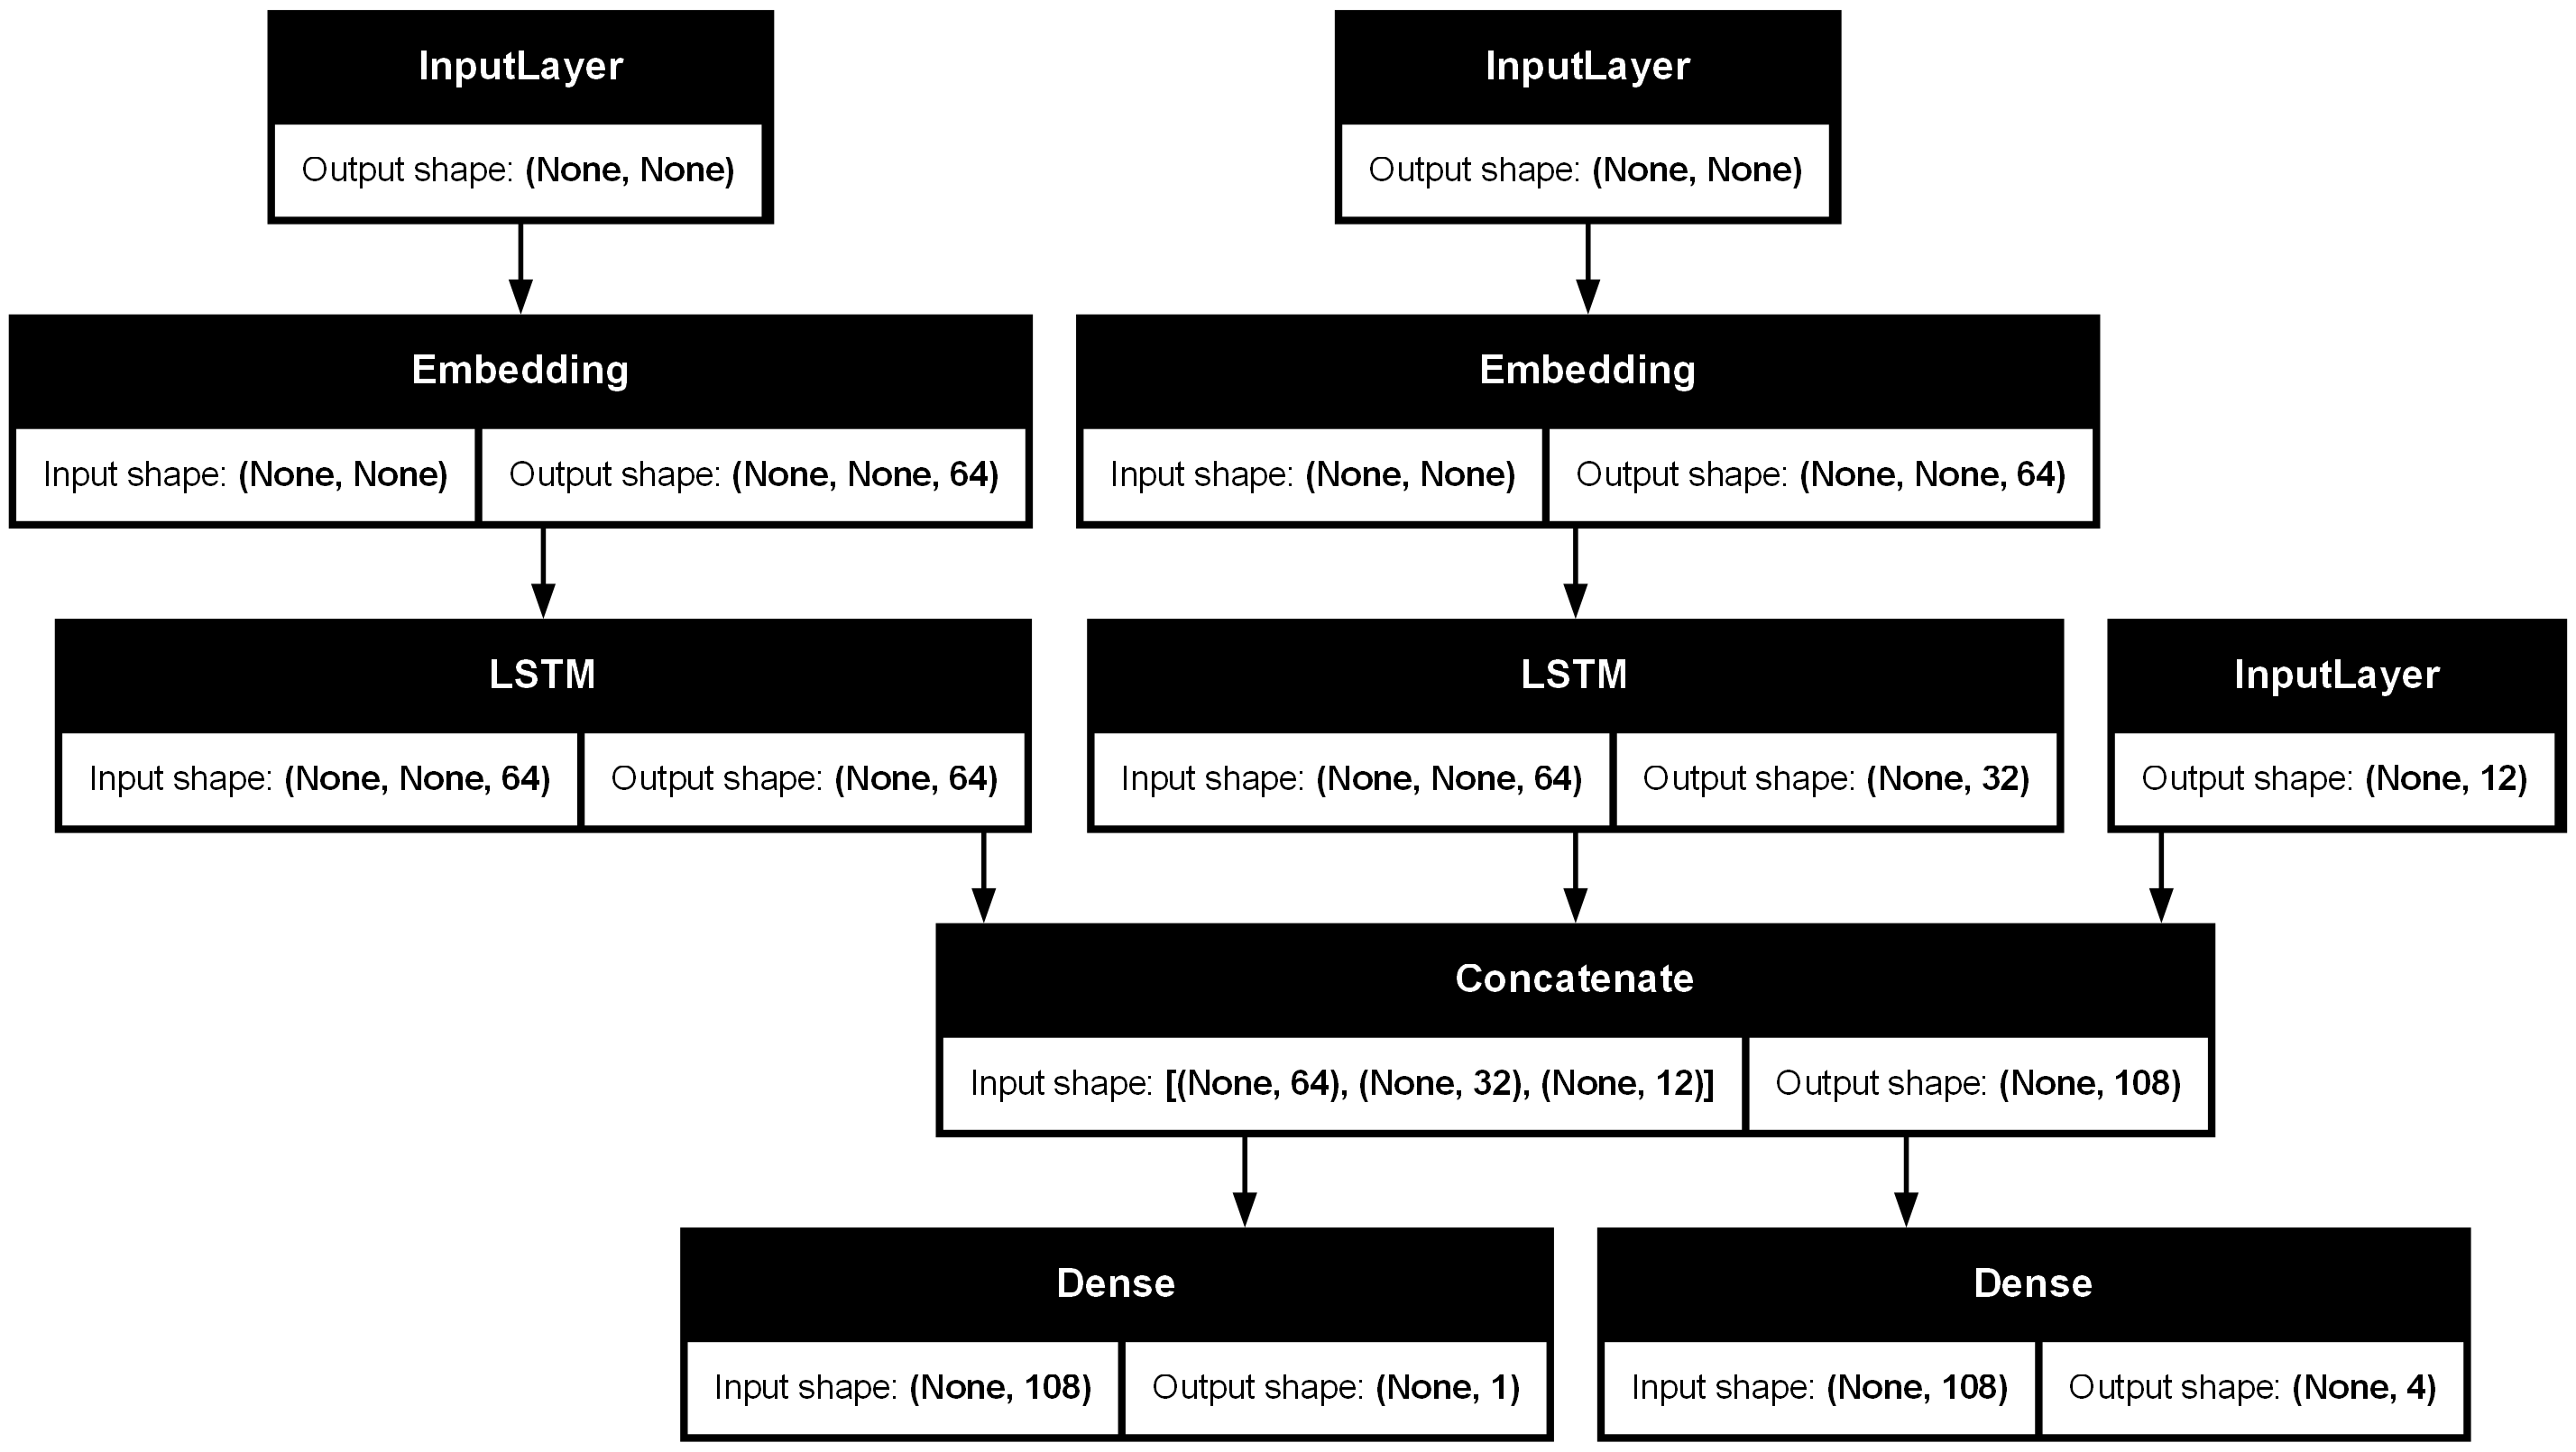

In [15]:
'''
    Functional API
'''
#模型包括3个输入、2个输出
import tensorflow as tf
layers = tf.keras.layers

#设定变量
num_tags = 12
num_words = 10000
num_departments = 4

#建立第一层InputTensor
title_input = tf.keras.Input(shape=(None,),name='title')
body_input = tf.keras.Input(shape=(None,),name='body')
tags_input = tf.keras.Input(shape=(num_tags,),name='tags')

#建立第二层
title_features = layers.Embedding(num_words,64)(title_input)
body_features = layers.Embedding(num_words,64)(body_input)

#建立第三层
title_features = layers.LSTM(64)(title_features)
body_features = layers.LSTM(32)(body_features)

#合并上面的神经层 concatenate合并了3个神经层, 输出维度 128 + 32 + 12 = 172
merged = layers.concatenate([title_features,body_features,tags_input])

#建立第四层,连接合并的神经层
priority_pred = layers.Dense(1,name='priority')(merged)
department_pred = layers.Dense(num_departments,name='department')(merged)

#建立模型
model = tf.keras.Model(inputs=[title_input,body_input,tags_input],
                       outputs=[priority_pred,department_pred])

#绘制模型,show_shapes=True ---> layer 含Input和Output信息
tf.keras.utils.plot_model(model,'multi_input_and_output_model.png',show_shapes=True)